In [2]:
!pip install wfdb

In [3]:
pip install matplotlib==3.1.3

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached matplotlib-3.1.3.tar.gz (40.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Running setup.py install for matplotlib: started
  Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\harini\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages\__pycache__\pylab.cpython-310.pyc
   from C:\Users\harini\AppData\Local\Temp\pip-uninstall-dxtq7b3_\pylab.cpython-310.pyc
  Moving to c:\users\harini\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages\matplotlib-3.7.1-py3.10-ns

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [501 lines of output]
      Edit setup.cfg to change the build options
      
      BUILDING MATPLOTLIB
        matplotlib: yes [3.1.3]
            python: yes [3.10.10 (tags/v3.10.10:aad5f6a, Feb  7 2023, 17:20:36) [MSC
                        v.1929 64 bit (AMD64)]]
          platform: yes [win32]
      
      OPTIONAL SUBPACKAGES
       sample_data: yes [installing]
             tests: no  [skipping due to configuration]
      
      OPTIONAL BACKEND EXTENSIONS
               agg: yes [installing]
             tkagg: yes [installing; run-time loading from Python Tcl/Tk]
            macosx: no  [Mac OS-X only]
      
      OPTIONAL PACKAGE DATA
              dlls: no  [skipping due to configuration]
      
      C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\site-packages\setuptools\dist.py:286: SetuptoolsDepre

In [ ]:
# Importing Required Packages
import keras
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import random
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import copy
import seaborn as sns
# pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import precision_score,recall_score,accuracy_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import scipy.io
from scipy.io import savemat
# Random Initialization
random.seed(42)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


C:\Users\harini\AppData\Local\Temp\ipykernel_21440\1273848778.py:10: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem . (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:84.)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print(os.listdir("C:/Users/harini/Documents/input"))

['vae']


In [ ]:
data= 'C:/Users/harini/Documents/input/mit-bih-arrhythmia-database/'
# List of Patients
patients = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']
# Creating a Empty Dataframe
dataframe = pd.DataFrame()

In [ ]:
import wfdb
# Reading all .atr files 
for pts in patients:
    # Generating filepath for all .atr file names
    file = data + pts
    # Saving annotation object
    annotation = wfdb.rdann(file, 'atr')
    # Extracting symbols from the object
    sym = annotation.symbol
    # Saving value counts
    values, counts = np.unique(sym, return_counts=True)
    # Writing data points into dataframe
    df_sub = pd.DataFrame({'symbol':values, 'Counts':counts, 'Patient Number':[pts]*len(counts)})
    # Concatenating all data points  
    dataframe = pd.concat([dataframe, df_sub],axis = 0)

In [ ]:
dataframe

,symbol,Counts,Patient Number
0,+,1,100
1,A,33,100
2,N,2239,100
3,V,1,100
0,+,1,101
...,...,...,...
0,+,3,234
1,J,50,234
2,N,2700,234
3,V,3,234


In [ ]:
# Non Beat Symbols
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?']

# Abnormal Beat Symbols
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

# Normal Beat Symbols
normal = ['N'] 

In [ ]:
# Classifying normal, abnormal or nonbeat
dataframe['category'] = -1
dataframe.loc[dataframe.symbol == 'N','category'] = 0
dataframe.loc[dataframe.symbol.isin(abnormal), 'category'] = 1    
      
dataframe.groupby('category').Counts.sum()

category
-1     3186
 0    75052
 1    34409
Name: Counts, dtype: int64

In [ ]:
#removing the non-beat from dataframe
dataframe = dataframe.loc[~((dataframe['category']==-1))]
dataframe.groupby('category').Counts.sum()

category
0    75052
1    34409
Name: Counts, dtype: int64

In [ ]:
def load_ecg(file):    
    # load the ecg
    record = wfdb.rdrecord(file)
    # load the annotation
    annotation = wfdb.rdann(file, 'atr')
    # extracting the signal
    p_signal = record.p_signal
    # extracting symbols and annotation index
    atr_sym = annotation.symbol
    atr_sample = annotation.sample
    
    return p_signal, atr_sym, atr_sample
    

In [ ]:
def build_XY(p_signal, df_ann, num_cols, normal):
    # this function builds the X,Y matrices for each beat
    # it also returns the original symbols for Y
    
    num_rows = len(df_ann)

    X = np.zeros((num_rows, num_cols))
    Y = np.zeros((num_rows,1))
    sym = []
    
    # keep track of rows
    max_row = 0

    for atr_sample, atr_sym in zip(df_ann.atr_sample.values,df_ann.atr_sym.values):

        left = max([0,(atr_sample - num_sec*fs) ])
        right = min([len(p_signal),(atr_sample + num_sec*fs) ])
        x = p_signal[left: right]
        if len(x) == num_cols:
            X[max_row,:] = x
            Y[max_row,:] = int(atr_sym in normal)
            sym.append(atr_sym)
            max_row += 1
    X = X[:max_row,:]
    Y = Y[:max_row,:]
    return X,Y,sym

In [ ]:
# creating abnormal beat dataset
def make_dataset(pts, num_sec, fs, abnormal):
    
    num_cols = 2*num_sec * fs
    X_all = np.zeros((1,num_cols))
    Y_all = np.zeros((1,1))
    sym_all = []
    
    max_rows = []
    for pt in pts:
        file = data + pt
        
        p_signal, atr_sym, atr_sample = load_ecg(file)
        
        
        p_signal = p_signal[:,0]
        
        
        df_ann = pd.DataFrame({'atr_sym':atr_sym,
                              'atr_sample':atr_sample})
        df_ann = df_ann.loc[df_ann.atr_sym.isin(abnormal)]
        
        X,Y,sym = build_XY(p_signal,df_ann, num_cols, abnormal)
        sym_all = sym_all+sym
        max_rows.append(X.shape[0])
        X_all = np.append(X_all,X,axis = 0)
        Y_all = np.append(Y_all,Y,axis = 0)
        
    
    X_all = X_all[1:,:]
    Y_all = Y_all[1:,:]

    return X_all, Y_all, sym_all

In [ ]:
# Parameter Values
num_sec = 1
fs = 360

X_abnormal, Y_abnormal, sym_abnormal = make_dataset(patients, num_sec, fs, abnormal)
print(X_abnormal.shape)

(34376, 720)


In [ ]:
data= 'C:/Users/harini/Documents/input/mitbih-normal-sinus-rhythm-database/mit-bih-normal-sinus-rhythm-database-1.0.0/'

In [ ]:
patients = ["16265","16272","16273","16539","16483"]

In [ ]:
# creating normal beat dataset
def make_dataset(pts, num_sec, fs, normal):
    # function for making dataset ignoring non-beats
    # input:
    #   pts - list of patients
    #   num_sec = number of seconds to include before and after the beat
    #   fs = frequency
    # output: 
    #   X_all = signal (nbeats , num_sec * fs columns)
    #   Y_all = binary is abnormal (nbeats, 1)
    #   sym_all = beat annotation symbol (nbeats,1)
    
    # initialize numpy arrays
    num_cols = 2*num_sec * fs
    X_all = np.zeros((1,num_cols))
    Y_all = np.zeros((1,1))
    sym_all = []
    
    # list to keep track of number of beats across patients
    max_rows = []
    for pt in pts:
        file = data + pt
        
        p_signal, atr_sym, atr_sample = load_ecg(file)
        
        # grab the first signal
        p_signal = p_signal[:,0]
        
        # make df to exclude the nonbeats
        df_ann = pd.DataFrame({'atr_sym':atr_sym,
                              'atr_sample':atr_sample})
        df_ann = df_ann.loc[df_ann.atr_sym.isin(normal)]
        
        X,Y,sym = build_XY(p_signal,df_ann, num_cols, normal)
        sym_all = sym_all+sym
        max_rows.append(X.shape[0])
        X_all = np.append(X_all,X,axis = 0)
        Y_all = np.append(Y_all,Y,axis = 0)
        
    # drop the first zero row
    X_all = X_all[1:,:]
    Y_all = Y_all[1:,:]

    return X_all, Y_all, sym_all

In [ ]:
# Parameter Values
num_sec = 1
fs = 360

X_normal, Y_normal, sym_normal = make_dataset(patients, num_sec, fs, normal)

In [ ]:
#X_normal = X_normal[0:34376,:]
print(X_normal.shape)
Y_normal = np.zeros((X_normal.shape[0], 1))


(490388, 720)


In [ ]:
X = np.append(X_normal,X_abnormal,axis=0)
Y = np.append(Y_normal,Y_abnormal,axis=0)
X = X[:,0:140]
print(X.shape)

(524764, 140)


In [ ]:
raw_data= np.append(X, Y, axis=1)
raw_data = pd.DataFrame(raw_data)


labels = raw_data.iloc[: , -1]
labels= labels.values
print(pd.Series(labels).value_counts()[0])
data = raw_data.iloc[:, 0:-1]
data= data.values

490388


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
test_data = scaler.transform(test_data)
train_data = scaler.transform(train_data)


train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [ ]:
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
print(normal_train_data.shape)

anomalous_train_data = train_data[train_labels]
anomalous_test_data = test_data[test_labels]


val_df, test_df = train_test_split(
  test_data,
  test_size=0.2, 
  random_state=42)

test_labels =  ~test_labels


(392363, 140)


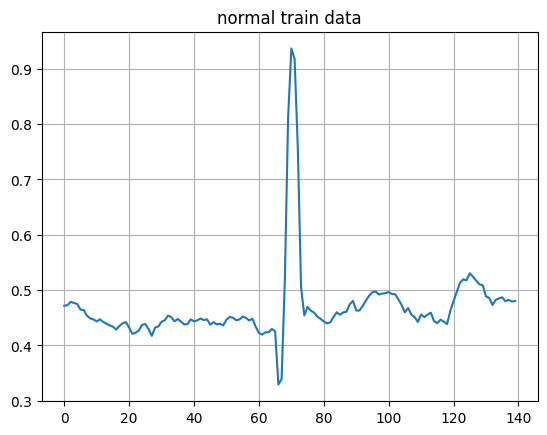

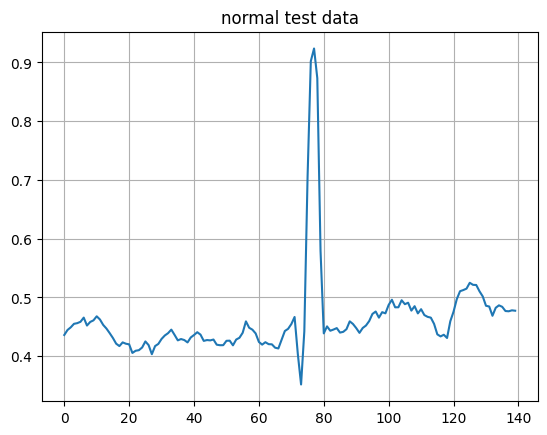

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[1])
plt.title("normal train data")
plt.show()

plt.grid()
plt.plot(np.arange(140), normal_test_data[0])
plt.title("normal test data")
plt.show()

(6928, 140)


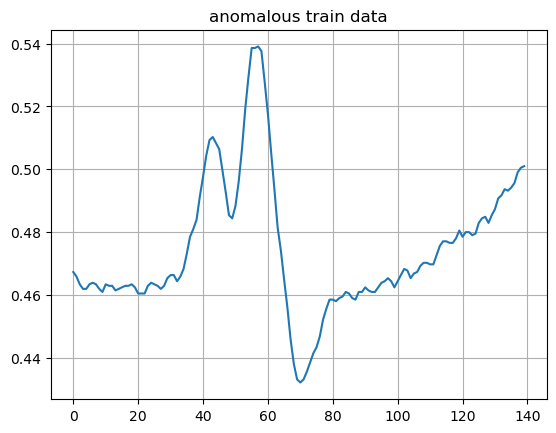

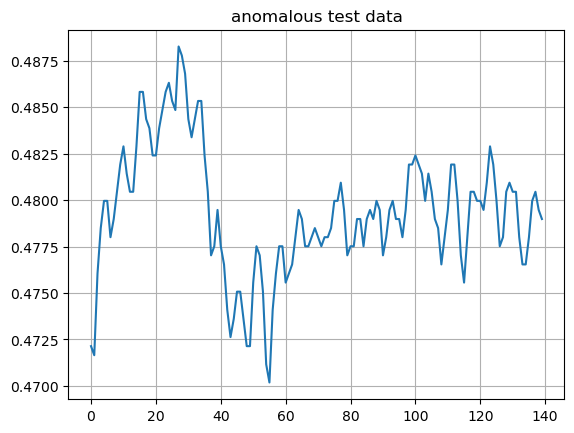

In [ ]:
print(anomalous_test_data.shape)

plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("anomalous train data")
plt.show()

plt.grid()
plt.plot(np.arange(140), anomalous_test_data[1])
plt.title("anomalous test data")
plt.show()

In [ ]:
class Sampling(layers.Layer):

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
def encoder_model(normal_train_data):
    encoder_inputs = tf.keras.Input(shape=(normal_train_data.shape[1]))
    x = layers.Dense(32, activation="relu")(encoder_inputs)
    x = layers.Dense(16, activation="relu")(x)
    # x = layers.Dense(8, activation="relu")(x)
   
    z_mean = layers.Dense(16, name="z_mean")(x)
    z_log_var = layers.Dense(16, name="z_log_var")(x)
    
   
    z = Sampling()([z_mean, z_log_var])
    
    encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
    return encoder

In [ ]:
def decoder_model(normal_train_data):
    
    # latent_inputs = tf.keras.Input(shape=(8,))
    # x = layers.Dense(16, activation="relu")(latent_inputs)
    # x = layers.Dense(32, activation="relu")(x)
    latent_inputs = tf.keras.Input(shape=(16,))
    x = layers.Dense(32, activation="relu")(latent_inputs)
    decoder_outputs = layers.Dense(normal_train_data.shape[1], activation="relu")(x)
    decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")
    return decoder

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, LeakyReLU
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.losses import mean_squared_error
from keras.losses import sparse_categorical_crossentropy
from keras.losses import mae

def build_discriminator(input_shape):
  
    inputs = Input(shape=input_shape)
    
    
    x = Dense(128)(inputs)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    
    outputs = Dense(1, activation='sigmoid')(x)
    
  
    model = Model(inputs=inputs, outputs=outputs)
    
  
    model.compile(loss=binary_crossentropy, optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    
    return model


In [ ]:

epochs = 100
learning_rate = 0.00001
adam = Adam(lr = learning_rate,beta_1 = 0.5)
input_shape = (1,normal_train_data.shape[1])  # Shape of the input samples
discriminator = build_discriminator(input_shape)
#discriminator = Discriminator(input_shape=(normal_train_data.shape[0],normal_train_data.shape[1]))
loss_vector = []
i=0
batch_size=1

C:\Users\harini\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.discrimiantor = discriminator

    def train_step(self, data):
        loss_vector.clear()
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            data=data.reshape(1,1,140)
            reconstruction=reconstruction.reshape(1,1,140)
            d_loss_real = discriminator(data, np.ones((batch_size, 1)))
            d_loss_fake = discriminator(reconstruction, np.zeros((batch_size, 1)))
            d_loss = 0.5 * tf.add(d_loss_real, d_loss_fake)
            d_loss = tf.reduce_mean(d_loss)
            reconstruction_loss = tf.reduce_mean(
                tf.keras.losses.mae(data, reconstruction)
            )
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss + d_loss
            loss_vector.append(total_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
            
        }
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded[2])
        return decoded

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:

encoder = encoder_model(normal_train_data)
decoder = decoder_model(normal_train_data)


vae = VAE(encoder, decoder)


vae.compile(optimizer=tf.keras.optimizers.Adam())


history = vae.fit(normal_train_data, normal_train_data, 
          epochs=4, 
          batch_size=1
          )

Epoch 1/4
392363/392363 [==============================] - 1081s 3ms/step - loss: 0.0201 - reconstruction_loss: 0.0201 - kl_loss: 4.3333e-06
Epoch 2/4
392363/392363 [==============================] - 1093s 3ms/step - loss: 0.0195 - reconstruction_loss: 0.0195 - kl_loss: 1.2344e-08
Epoch 3/4
392363/392363 [==============================] - 1070s 3ms/step - loss: 0.0195 - reconstruction_loss: 0.0195 - kl_loss: 6.5342e-09
Epoch 4/4
392363/392363 [==============================] - 1120s 3ms/step - loss: 0.0195 - reconstruction_loss: 0.0195 - kl_loss: 1.9163e-09


In [ ]:
count = np.count_nonzero(test_labels)
print(count)

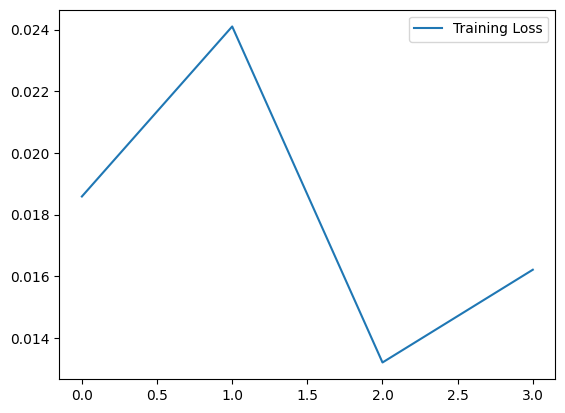

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.legend()

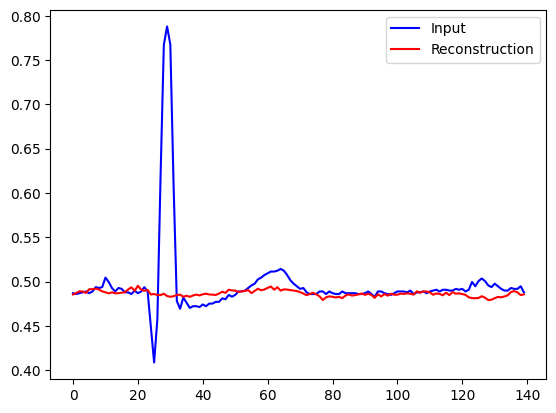

In [ ]:
encoded_imgs = vae.encoder(normal_test_data)
decoded_imgs = vae.decoder(encoded_imgs[0]).numpy()
plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
#plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

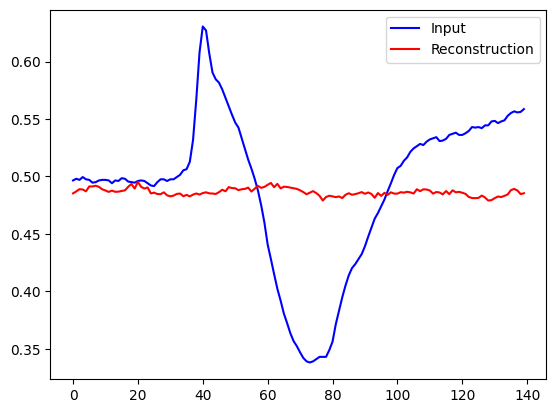

In [ ]:
encoded_imgs = vae.encoder(anomalous_test_data)
decoded_imgs = vae.decoder(encoded_imgs[0]).numpy()
plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
#plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

12262/12262 [==============================] - 32s 3ms/step


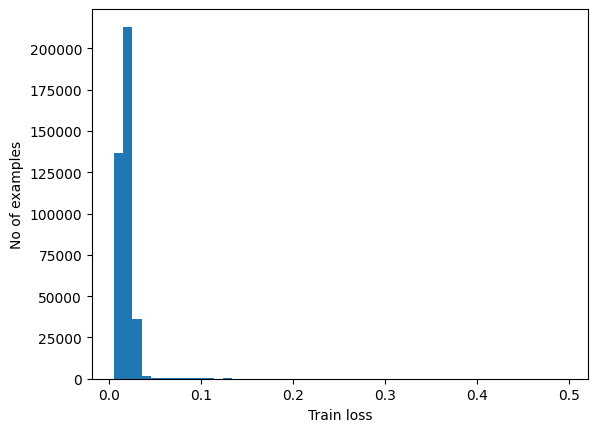

In [ ]:
reconstructions = vae.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
print(loss_vector[0])

In [ ]:
threshold_vae = np.mean(train_loss) + 1 * np.std(train_loss)
print("Threshold: ", threshold_vae)

Threshold:  tf.Tensor(0.03862259086787628, shape=(), dtype=float64)


217/217 [==============================] - 0s 1ms/step


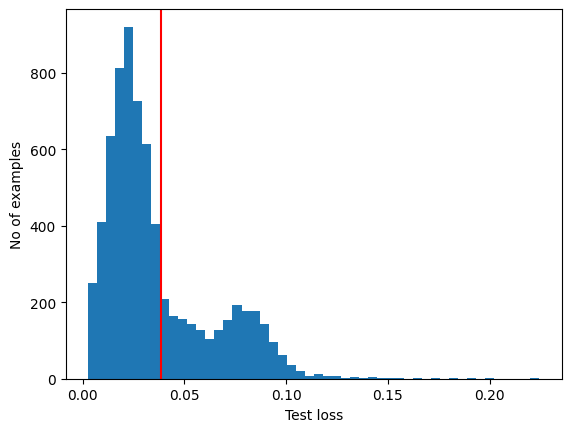

In [ ]:
reconstructions = vae.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.axvline(threshold_vae,c='r')
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
def predict(model, data, threshold):
  reconstructions = model.predict(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [ ]:
preds = predict(vae, test_data, threshold_vae)
print("Variational Autoencoder")
print_stats(preds, test_labels)

3280/3280 [==============================] - 8s 2ms/step
Variational Autoencoder
Accuracy = 0.9421455318094766
Precision = 0.9527607905698839
Recall = 0.9869931140015302


In [ ]:
test_data_5k = np.loadtxt('C:/Users/harini/Documents/input/test_data_5k.txt')
test_label_5k = np.loadtxt('C:/Users/harini/Documents/input/test_label_5k.txt')

In [ ]:

preds = predict(vae, test_data_5k, threshold_vae)
print("No.of outliers:",tf.math.count_nonzero(~preds))

3228/3228 [==============================] - 6s 2ms/step
No.of outliers: tf.Tensor(5280, shape=(), dtype=int64)


In [ ]:
test_data_10k = np.loadtxt('C:/Users/harini/Documents/input/test_data_10k.txt')
test_label_10k = np.loadtxt('C:/Users/harini/Documents/input/test_label_10k.txt')

In [ ]:

preds = predict(vae, test_data_10k, threshold_vae)
print("No.of outliers:",tf.math.count_nonzero(~preds))

3228/3228 [==============================] - 7s 2ms/step
No.of outliers: tf.Tensor(10564, shape=(), dtype=int64)


In [ ]:
test_data_15k = np.loadtxt('C:/Users/harini/Documents/input/test_data_15k.txt')
test_label_15k = np.loadtxt('C:/Users/harini/Documents/input/test_label_15k.txt')

In [ ]:

preds = predict(vae, test_data_15k, threshold_vae)
print("No.of outliers:",tf.math.count_nonzero(~preds))

3228/3228 [==============================] - 7s 2ms/step
No.of outliers: tf.Tensor(15814, shape=(), dtype=int64)


In [ ]:
test_data_20k = np.loadtxt('C:/Users/harini/Documents/input/test_data_20k.txt')
test_label_20k = np.loadtxt('C:/Users/harini/Documents/input/test_label_20k.txt')

In [ ]:

preds = predict(vae, test_data_20k, threshold_vae)
print("No.of outliers:",tf.math.count_nonzero(~preds))

3228/3228 [==============================] - 7s 2ms/step
No.of outliers: tf.Tensor(21118, shape=(), dtype=int64)


In [ ]:
test_data_25k = np.loadtxt('C:/Users/harini/Documents/input/test_data_25k.txt')
test_label_25k = np.loadtxt('C:/Users/harini/Documents/input/test_label_25k.txt')

In [ ]:

preds = predict(vae, test_data_25k, threshold_vae)
print("No.of outliers:",tf.math.count_nonzero(~preds))

3228/3228 [==============================] - 7s 2ms/step
No.of outliers: tf.Tensor(26327, shape=(), dtype=int64)
